In [1]:
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import neighbors
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 



In [3]:
train_data = scipy.io.loadmat("Practice_Dec24/train_32x32.mat")


In [5]:
test_data = scipy.io.loadmat("Practice_Dec24/test_32x32.mat")


In [6]:
train_data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [7]:
X=train_data['X']
Y=train_data['y']

In [8]:
len(X)


32

In [9]:
len(Y)


73257

In [10]:
X.shape

(32, 32, 3, 73257)

In [11]:
Y.shape

(73257, 1)

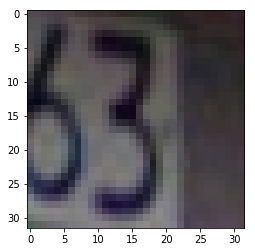

[3]


In [12]:
img_index=25
plt.imshow(X[:,:,:,img_index])
plt.show()
print(Y[img_index])

In [13]:
%whos

Variable                 Type        Data/Info
----------------------------------------------
RandomForestClassifier   ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X                        ndarray     32x32x3x73257: 225045504 elems, type `uint8`, 225045504 bytes (214.6201171875 Mb)
Y                        ndarray     73257x1: 73257 elems, type `uint8`, 73257 bytes
accuracy_score           function    <function accuracy_score at 0x7fe0fe5958c8>
img_index                int         25
neighbors                module      <module 'sklearn.neighbor<...>n/neighbors/__init__.py'>
np                       module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt                      module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
scipy                    module      <module 'scipy' from '/us<...>kages/scipy/__init__.py'>
shuffle                  function    <function shuffle at 0x7fe0fefe0d08>
test_data                dict        n=5
t

In [14]:
X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T

In [15]:
Y = Y.reshape(Y.shape[0],)

In [16]:
np.shape(X)

(73257, 3072)

In [17]:
X, Y = shuffle(X, Y, random_state=42)

In [18]:
size = X.shape[0]

In [19]:
X = X[:size,:]

In [20]:
Y = Y[:size]

In [21]:


# Splitting 33 percent (approx. 1/3) data for test and remaining 67 (approx. 2/3) for training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0) 



In [ ]:
d= {}

for k in range(5, 50, 5): # Varying the k value from 5 to 100 in step size of 10
    l =[]
    n_neighbors = k # Number of neighbors for kNN

    # Create an instance of neighbors class imported from sklearn
    classifier = neighbors.KNeighborsClassifier(n_neighbors)

    # Fit the generated data to the model 
    classifier.fit(X_train, y_train)

    # Get the training scores
    l.append("%.3f"%classifier.score(X_train, y_train))
    
    # Get the prediction result (for test data)
    Z = classifier.predict(X_test)

    # Get the test accurracy
    l.append("%.3f"%accuracy_score(y_test, Z))
    d[k] = l

# Printing out as a table format
print ("{:<8} {:<15} {:<10}".format('k-value','Training score','Test score'))
for key, val in sorted(d.items()):
    label, num = val
    print ("{:<8} {:<15} {:<10}".format(key, label, num))
